In [1]:
import orbipy as op
import numpy as np
from scipy.optimize import bisect

In [8]:
model = op.crtbp3_model('Earth-Moon (default)', integrator=op.dopri5_integrator(), stm=True)
one_thousand_kms = (1-model.L1) / 61.350

left = op.eventX(model.L1 - 33 * one_thousand_kms)
right = op.eventX(model.L1 + 53 * one_thousand_kms)

points = []
dr = 0.3*one_thousand_kms # 1
initial_state = model.get_zero_state()
initial_state[[0,2]] = [model.L1, 0]
points.append(initial_state[[0, 2]])

def zero_velocity_correction(correction, initial_state, previous_alpha_degrees):
    """
    Calculates the next point on the zero velocity line.
    :param initial_state:
    :param previous_alpha_degrees: previous alpha in degrees (also initial alpha), used for approximating the direction of the line
    :return: ([x,z], alpha)
    """
    def find_alpha(alpha_degrees):
        """
        Given angle alpha, calculates the state (polar coordinates) and returns the corresponding velocity
        """
        state = model.get_zero_state().copy()
        x = initial_state[0] + np.cos(np.radians(alpha_degrees))*dr # np.cos(radians)
        z = initial_state[2] + np.sin(np.radians(alpha_degrees))*dr # np.sin(radians)
        state[[0,2]] = x, z
        v = correction.calc_dv(0, state)
        return v[4] # returns vy

    # Finding the angle corresponding to the vy=0
    res = bisect(find_alpha, previous_alpha_degrees - 30, previous_alpha_degrees + 30, 
        xtol=1e-6, maxiter=100,
        full_output=True)
    
    target_alpha_degrees = res[0]
    print("    alpha: ", target_alpha_degrees)
    r = np.zeros_like(initial_state)
    x = np.cos(np.radians(target_alpha_degrees))*dr
    z = np.sin(np.radians(target_alpha_degrees))*dr
    r[[0, 2]] = x, z
    return r, target_alpha_degrees

In [10]:
alpha = 90 # initial angle, vertical from the x axis

for i in range(500):
    print(f"Calculating zvl point {i}:")
    correction = op.border_correction(model, op.y_direction(), left, right)
    zero_velocity_point_correction, alpha = zero_velocity_correction(correction, initial_state, alpha)
    initial_state += zero_velocity_point_correction
    points.append(initial_state[[0, 2]])
    print(f"    resulting state: {points[-1]}")
print("==== Finished ====")

== alpha 80.97599476575851
[0.90753365 0.26114736]
== alpha 81.10725045204163
[0.90765696 0.26193543]
== alpha 81.23849898576736
[0.90777846 0.26272378]
== alpha 81.36966705322266
[0.90789816 0.26351241]
== alpha 81.50074034929276
[0.90801605 0.26430131]
== alpha 81.63178861141205
[0.90813214 0.26509047]
== alpha 81.76276355981827
[0.90824642 0.26587991]
== alpha 81.89360082149506
[0.9083589  0.26666959]
== alpha 82.02438622713089
[0.90846957 0.26745954]
== alpha 82.15506970882416
[0.90857845 0.26824973]
== alpha 82.28565841913223
[0.90868552 0.26904017]
== alpha 82.41610586643219
[0.9087908  0.26983086]
== alpha 82.54647463560104
[0.90889427 0.27062178]
== alpha 82.6766949892044
[0.90899595 0.27141293]
== alpha 82.80680447816849
[0.90909582 0.27220431]
== alpha 82.93677806854248
[0.90919391 0.27299592]
== alpha 83.06660324335098
[0.9092902  0.27378775]
== alpha 83.19630146026611
[0.9093847  0.27457979]
== alpha 83.32584232091904
[0.9094774  0.27537204]
== alpha 83.45523297786713
[0.90

capi_return is NULL
Call-back cb_solout_in___user__routines failed.


KeyboardInterrupt: 

In [11]:
zero_velocity_line = np.array(points)
np.save('../data/contour_points/zvl/zvl_4__0_3_dv.npy', zero_velocity_line)
print(zero_velocity_line)

[[0.89888846 0.22141865]
 [0.89910061 0.22218758]
 [0.89931116 0.22295695]
 [0.8995201  0.22372676]
 [0.89972743 0.22449701]
 [0.89993313 0.22526769]
 [0.9001372  0.2260388 ]
 [0.90033962 0.22681035]
 [0.90054041 0.22758232]
 [0.90073953 0.22835473]
 [0.90093699 0.22912756]
 [0.90113279 0.22990082]
 [0.9013269  0.2306745 ]
 [0.90151934 0.2314486 ]
 [0.90171008 0.23222312]
 [0.90189913 0.23299805]
 [0.90208647 0.2337734 ]
 [0.90227211 0.23454915]
 [0.90245604 0.23532532]
 [0.90263825 0.23610189]
 [0.90281874 0.23687886]
 [0.9029975  0.23765623]
 [0.90317452 0.238434  ]
 [0.90334981 0.23921216]
 [0.90352336 0.23999071]
 [0.90369517 0.24076965]
 [0.90386522 0.24154897]
 [0.90403352 0.24232867]
 [0.90420007 0.24310875]
 [0.90436486 0.24388921]
 [0.90452786 0.24467003]
 [0.90468911 0.24545123]
 [0.90484856 0.24623279]
 [0.90500602 0.24701475]
 [0.9051617  0.24779707]
 [0.9053156  0.24857974]
 [0.90546771 0.24936276]
 [0.90561803 0.25014613]
 [0.90576655 0.25092984]
 [0.90591328 0.25171389]


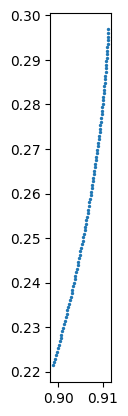

In [12]:
from matplotlib import pyplot as plt

plt.scatter(zero_velocity_line[:,0], zero_velocity_line[:,1], s=2)
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.show()

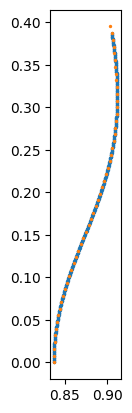

In [3]:
from matplotlib import pyplot as plt

# data1 = np.load('../data/contour_points/zvl/zvl_2.npy')
data2 = np.load('../data/contour_points/zvl/zvl_3.npy')
data3 = np.load('../data/contour_points/zvl/zvl_4.npy')
# plt.scatter(data1[29:34,0], data1[29:34,1], s=2)
plt.scatter(data3[:,0], data3[:,1], s=2)
plt.scatter(data2[:,0], data2[:,1], s=2)
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.show()